In [2]:
import numpy as np

In [ ]:
def compute(values):
  output = np.empty(len(values))

  for i in range(len(values)):
    output[i] = 1.0 / values[i]
  return output

In [ ]:
rng = np.random.default_rng(seed = 1701)

values = rng.integers(1, 10, size = 5)
compute(values)

array([0.11111111, 0.25      , 1.        , 0.33333333, 0.125     ])

In [ ]:
# magic function : %~~

big_array = rng.integers(1, 100, size = 1000000)
%timeit compute(big_array)

2.9 s ± 247 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Ufuncs 소개

함수를 구현하여 실수의 역수를 구하는 방법과, Ufunctions의 벡터 연산을 통해 구하는 방법은 크게 차이가 없다.

In [ ]:
print(compute(values))
print(1.0 / values)

[0.11111111 0.25       1.         0.33333333 0.125     ]
[0.11111111 0.25       1.         0.33333333 0.125     ]


In [ ]:
# s -> ms 단위로 시간 감소
%timeit (1.0 / big_array)

1.53 ms ± 201 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Exploring Numpy's Ufuncs

In [3]:
# Array Arithmetic

x = np.arange(4)
print(f"x = {x}")
print(f"x + 5 = {x + 5}")
print(f"x - 5 = {x - 5}")
print(f"x * 2 = {x * 2}")
print(f"x / 2 = {x / 2}")
print(f"x // 2 = {x // 2}")

x = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


In [5]:
print(f"-x = {-x}")
print(f"x ** 2 = {x ** 2}")
print(f"x % 2 = {x % 2}")

-x = [ 0 -1 -2 -3]
x ** 2 = [0 1 4 9]
x % 2 = [0 1 0 1]


In [6]:
np.add(x, 2)

array([2, 3, 4, 5])

### Operate Overriding을 통해 넘파이 클래스 내부 메소스 호출
operateor를 통해 연산을 진행할 시, 실제 계산은 메소드를 통해 계산됨

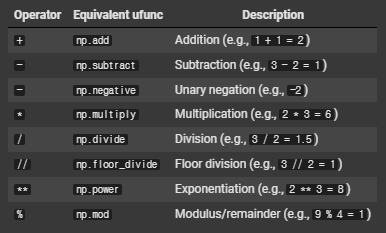

## Absolute Value

In [35]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

In [12]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [13]:
np.abs(x)

array([2, 1, 0, 1, 2])

## 지수 로그 함수

In [39]:
x = [1, 2, 3]

print(f"x = {x}")
print(f"e^x = {np.exp(x)}")
print(f"2^x = {np.exp2(x)}")
print(f"3^x = {np.power(3., x)}")

x = [1, 2, 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3.  9. 27.]


In [40]:
print(f"ln(x) = {np.log(x)}")
print(f"log2(x) = {np.log2(x)}")
print(f"log10(x) = {np.log10(x)}")

ln(x) = [0.         0.69314718 1.09861229]
log2(x) = [0.        1.        1.5849625]
log10(x) = [0.         0.30103    0.47712125]


In [41]:
print(f"exp(x) - 1 = {np.expm1(x)}")
print(f"log(1 + x) = {np.log1p(x)}")

exp(x) - 1 = [ 1.71828183  6.3890561  19.08553692]
log(1 + x) = [0.69314718 1.09861229 1.38629436]


# Advanced Ufuncs Features

In [47]:
x = np.arange(50000)
y_1 = x * 10
y_2 = np.empty(50000)
np.multiply(x, 10, out = y_2)

%timeit y_1
%timeit y_2

10.9 ns ± 0.0833 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
12.1 ns ± 2.87 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [55]:
# 누적 계산
x = np.arange(1, 6)
print(f"누적 합 : {np.add.reduce(x)}")
print(f"누적 곱 : {np.multiply.reduce(x)}")
print(f"누적 합 리스트 : {np.add.accumulate(x)}")
print(f"누적 곱 리스트 : {np.multiply.accumulate(x)}")

누적 합 : 15
누적 곱 : 120
누적 합 리스트 : [ 1  3  6 10 15]
누적 곱 리스트 : [  1   2   6  24 120]


In [56]:
# 행렬 연산
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])